# ELBO Evolution

<a href="https://colab.research.google.com/github/PGM-Lab/ProbModelingDNNs/blob/master/notebooks/res/ELBO-Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This notebook generates the graphic in Figure 11, which shows ELBO evolution for the VAE of Example 10 (with a mini-batch size of 100 samples) and the non-linear probabilistic PCA introduced in Example 6. The latter model is equivalent to the former but without amortized inference network. 

ELBO values for each time step are loaded from CSV files present in the current folder.


In [ ]:
!pip install matplotlib
!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys

# I/O paths
IN_COLAB = 'google.colab' in sys.modules
img_path = "../../img/" if not IN_COLAB else "./"
res_path = "./" if not IN_COLAB else "https://raw.githubusercontent.com/PGM-Lab/ProbModelingDNNs/master/notebooks/res/"

tags = ["nlpca", "vae"]
labels = ["non-linear PCA", "VAE"]


In [3]:
data = None

for t in tags:
    d = pd.read_csv(f"{res_path}elbo_{t}.csv").iloc[:,1]
    if data is None:
        data = d
    else:
        data = pd.concat([data, d], axis=1, sort=False)

data.columns = tags
num_epochs = len(data)

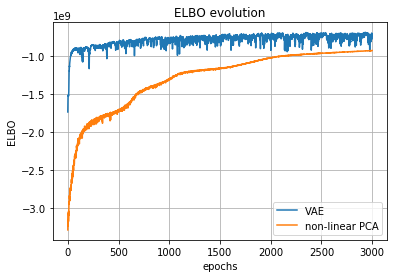

In [4]:
colors = [plt.get_cmap("gnuplot2")(0.08),
          plt.get_cmap("gist_rainbow")(0.33)]

f = plt.figure()


for i in range(len(tags)-1,-1,-1):
    plt.plot(range(0, num_epochs, 1), data[tags[i]])


plt.xlabel('epochs')
plt.ylabel('ELBO')
plt.title('ELBO evolution')
plt.legend(labels[1::-1])
plt.grid(True)
plt.show()

f.savefig(img_path+"elbo.pdf", bbox_inches='tight')